In [1]:
import numpy as np
import pandas as pd
import scipy

from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

import requests
from io import StringIO, BytesIO
from os import path

import numbers

from utils import *


In [2]:
# stuff for display

from IPython.lib.pretty import pretty, pprint

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 120)

In [3]:
def download_sheet(file_id, sheet_id):
    r = requests.get(f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv&id={file_id}&gid={sheet_id}')
    df = pd.read_csv(BytesIO(r.content), thousands=',')
    return df
    

In [4]:
refresh_rp_file = True

rp_file_id = "1kBrPl0pdAO8gjOf_NrTgAPseFtqQA27fdfEbMBBeAhs"

sheet_ids = {
    "data_1_9":   "1682088244",
    "data_10_29": "1691041080",
}

local_files = {
    "data":       './data/rp-data.pickle',
    "natures" :   './data/natures.pickle',
    "subskills":  './data/subskills.pickle',
    "mainskills": './data/mainskills.pickle',
    "pokedex":    './data/pokedex.pickle',
}


if (refresh_rp_file):

    data_1_9 = download_sheet(rp_file_id, sheet_ids["data_1_9"])
    data_10_29 = download_sheet(rp_file_id, sheet_ids["data_10_29"])
    
    data = pd.concat([data_1_9, data_10_29], axis = 0)
    data = data.dropna(subset=["Pokemon","Level","RP","Nature","MS lvl"])
    data = data.fillna({'Amnt':0 ,'Ing2P':0, 'Help skill bonus': 1, 'RP Multiplier': 1, 'ModelRP': -1, 'Difference': -1})
    data = data.fillna({'Sub Skill 1':'','Sub Skill 2':'', 'Ingredient 2': '', 'Source':''})


    # avoid second food item
    data = data[ data["Level"] < 30 ]
    
    # avoid a bug in RP of freshly catched mon with skill up unlocked.
    data = data[ ~( (data["Sub Skill 1"] == "Skill Level Up S") & (data["MS lvl"] == 2) & (data["Level"] > 9) )]
    data = data[ ~( (data["Sub Skill 1"] == "Skill Level Up M") & (data["MS lvl"] == 3) & (data["Level"] > 9) )]
    
    data.to_pickle(local_files["data"])
    
else:
    
    data = pd.read_pickle(local_files["data"])
    
    
    
natures = pd.read_pickle(local_files["natures"])
mainskills = pd.read_pickle(local_files["mainskills"])
subskills = pd.read_pickle(local_files["subskills"])
pokedex = pd.read_pickle(local_files["pokedex"])



In [5]:
data.describe()
data.head()

# natures.head()
# mainskills.head()
# subskills.head()
# pokedex.head()

,Level,RP,MS lvl,ModelRP,Difference,Freq1,FreqL,Inv,Berry1,BerryL,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,BerryD,IngD,Dupes,Amnt,Ing2P,Help skill bonus,RP Multiplier
count,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.000000,5363.0,5363.0,5363.0,5363.000000,5363.000000
mean,9.372366,552.778669,1.390080,552.807511,0.028842,4009.602834,3877.125866,11.982472,28.013798,36.419914,108.813537,0.994731,0.989534,0.995152,1.000709,1.005743,0.206770,30.474535,52.804028,145.402760,1.0,0.0,0.0,0.989649,1.024947
std,6.191061,320.993957,0.886716,321.016432,0.811593,941.036301,1002.981530,3.301982,2.616441,6.831132,15.706224,0.290134,0.059448,0.045458,0.118455,0.118160,0.043825,32.391146,24.896754,54.500441,0.0,0.0,0.0,0.034543,0.065911
min,1.000000,245.000000,1.000000,245.070000,-9.710000,2200.000000,1489.118400,7.000000,24.000000,24.000000,90.000000,0.520000,0.890000,0.920000,0.800000,0.800000,0.080000,5.990000,25.000000,90.000000,1.0,0.0,0.0,0.790000,1.000000
25%,5.000000,348.000000,1.000000,347.770000,-0.270000,3400.000000,3099.600000,10.000000,26.000000,32.000000,98.000000,0.800000,1.000000,1.000000,1.000000,1.000000,0.180000,11.990000,34.000000,101.000000,1.0,0.0,0.0,1.000000,1.000000
50%,8.000000,432.000000,1.000000,431.840000,-0.010000,4200.000000,3864.960000,11.000000,28.000000,35.000000,103.000000,0.930000,1.000000,1.000000,1.000000,1.000000,0.200000,18.180000,43.000000,121.000000,1.0,0.0,0.0,1.000000,1.000000
75%,12.000000,655.000000,1.000000,655.630000,0.270000,4500.000000,4491.000000,14.000000,30.000000,40.000000,115.000000,1.160000,1.000000,1.000000,1.000000,1.000000,0.230000,43.050000,66.000000,202.000000,1.0,0.0,0.0,1.000000,1.000000
max,29.000000,3432.000000,6.000000,3432.820000,7.140000,6300.000000,6916.140000,23.000000,35.000000,67.000000,151.000000,2.410000,1.120000,1.080000,1.200000,1.200000,0.380000,422.030000,195.000000,302.000000,1.0,0.0,0.0,1.000000,1.440000


,Pokemon,Level,RP,Nature,MS lvl,Source,ModelRP,Difference,Nature2,ID,NatureP,NatureN,Freq1,FreqL,Type,Class,MSkill,Inv,Berry1,BerryL,Ing1,Ing1P,Helps per hour,Helps Neutral,NrgMult,IngrMult,SkillMult,Ingr%,SklContr,RPneutral,IDNeutral,BerryD,IngD,Dupes,DupeMatch,Sub Skill 1,Sub Skill 2,Ingredient 2,Amnt,Ing2P,Help skill bonus,RP Multiplier
0,Arbok,8.0,531.0,Hardy,1,Questions help guides,530.76,-0.24,Neutral,ArbokNeutral81,-,-,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.00,1.00,1.0,1.0,0.26,22.79,531.00,ArbokNeutral81,78.0,103.0,1,True,,,,0.0,0.0,1.0,1.0
1,Arbok,9.0,574.0,Naughty,1,Rate My Mon,574.45,0.45,Naughty,ArbokNaughty91,Speed of Help,Main Skill Chance,3700.0,3276.72,Poison,Berries,Charge Energy S,14.0,32.0,40,Bean Sausage,103.0,1.09,0.90,1.00,1.0,0.8,0.26,22.79,538.39,ArbokNeutral91,80.0,103.0,1,True,,,,0.0,0.0,1.0,1.0
2,Arbok,8.0,538.0,Quiet,1,Questions help guides,538.14,0.14,Quiet,ArbokQuiet81,Ingredient Finding,Exp Gains,3700.0,3648.20,Poison,Berries,Charge Energy S,14.0,32.0,39,Bean Sausage,103.0,0.98,1.00,1.00,1.2,1.0,0.26,22.79,530.62,ArbokNeutral81,78.0,103.0,1,True,,,,0.0,0.0,1.0,1.0
3,Arcanine,5.0,958.0,Calm,3,,957.99,-0.01,Calm,ArcanineCalm53,Main Skill Chance,Speed of Help,2500.0,2728.00,Fire,Skills,Extra Helpful S,16.0,27.0,31,Fiery Herb,130.0,1.31,1.11,1.00,1.0,1.2,0.14,84.46,937.91,ArcanineNeutral53,31.0,130.0,1,True,,,,0.0,0.0,1.0,1.0
4,Arcanine,3.0,715.0,Lax,2,pokemon sleep general,715.00,0.00,Lax,ArcanineLax32,Energy Recovery,Main Skill Chance,2500.0,2490.00,Fire,Skills,Extra Helpful S,16.0,27.0,29,Fiery Herb,130.0,1.44,1.00,1.08,1.0,0.8,0.14,61.17,750.12,ArcanineNeutral32,29.0,130.0,1,True,,,,0.0,0.0,1.0,1.0


In [6]:
# nature and subskill with known effects on production

nature_soh_effect = 0.1
subskill_help_s_effect = 0.07
subskill_help_m_effect = 0.14

subskill_ing_s_effect = 0.18
subskill_ing_m_effect = 0.36

subskill_trigger_s_effect = 0.18
subskill_trigger_m_effect = 0.36

In [7]:
# All the formula "ifs" will be implemented as one-hot vector  (0,1)

# Specialty (Class)

classes = ["Ingredients","Berries","Skills"]
data_has_class = dict( [(c, (data["Class"] == c).astype(int).to_numpy() ) for c in classes])

# Natures

traits = natures["TraitPos"].unique()

natures_with_positive_trait = dict( [( t, natures[ natures["TraitPos"] == t ]["Nature"].tolist() ) for t in traits ] )
natures_with_negative_trait = dict( [( t, natures[ natures["TraitNeg"] == t ]["Nature"].tolist() ) for t in traits ] )

data_has_positive_trait = dict( [(t, data["Nature"].isin(natures_with_positive_trait[t]).astype(int).to_numpy() ) for t in traits] )
data_has_negative_trait = dict( [(t, data["Nature"].isin(natures_with_negative_trait[t]).astype(int).to_numpy() ) for t in traits] )

# Subskills

subs = subskills["Subskill"].unique()

data_has_subskill = dict([ (s, 
                          ( ( (data["Sub Skill 1"] == s) & (data["Level"] >= 10) ) | 
                            ( (data["Sub Skill 2"] == s) & (data["Level"] >= 25) ) 
                          ).astype(int).to_numpy()
                      )
       for s in subs
     ])

In [8]:
# Here we start to organise the globals variables so writing the model get less confusing.

from types import SimpleNamespace 
computed = SimpleNamespace()

computed.has_class          = data_has_class
computed.has_positive_trait = data_has_positive_trait
computed.has_negative_trait = data_has_negative_trait
computed.has_subskill       = data_has_subskill

# We could redo that work but it's not related to the optimisation
computed.ing1_power_base      = data["Ing1P"]
computed.berry_power_base     = data["Berry1"]
computed.berry_power_at_level = data["BerryL"]

In [9]:
# Here we will reproduce the Help/hr information as a test of using those one-hot vectors.

data_period_base  = data["Freq1"]
data_period_level = data_period_base * ((501-data["Level"])/500.0) 

nature_correction = (
    1 
    - (computed.has_positive_trait["Speed of Help"] * nature_soh_effect) # Speed is the only nature where positive is a substraction
    + (computed.has_negative_trait["Speed of Help"] * nature_soh_effect) # Because we work on time between helps.
    )

subskill_correction = (
    1 
    - (computed.has_subskill["Helping Speed S"] * subskill_help_s_effect) 
    - (computed.has_subskill["Helping Speed M"] * subskill_help_m_effect)
    )

data_period_level_nature_subskill = data_period_level * nature_correction * subskill_correction

# Are we the same up to csv precision ? Yes
#(data_period_level_nature_subskill - data["FreqL"]).describe()

# Are we exactly the same ? Yes
data_helps_per_hour = np.floor(100*3600/data_period_level_nature_subskill)/100
(data_helps_per_hour - data["Helps per hour"]).describe()

# Save to computed
computed.period_base = data_period_base
computed.period_level = data_period_level
computed.helps_per_hour = data_helps_per_hour


count    5363.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

In [10]:
# Here we build the initial guess
# And package it into the 1-D array that the optimizer require.
# While doing, so we'll build a map between the model dict and the 1-D array otherwise it'll get confusing fast.

initial = {
    'Nature Ingredient Finding': 0.2, # Idea: We start at 0.25 because it's about midpoint between 0.18 and  0.36
    'Nature Main Skill Chance': 0.2,  # If it still goes to 0.2 it is what it is.
    'Nature Energy Recovery': 0.08,
}


In [11]:
# Initial guess for the ing% and skillProduct ( skill% * skillValue ) 

pokemon_to_position = {}
guess_ing_fractions = []
guess_skl_products = []

previous_ing_fractions = []
previous_skl_products = []

for record in pokedex.to_dict(orient='records') :   
    
    pokemon_to_position[record["Pokemon"]] = len(guess_ing_fractions) 
    
    # Simple linear model
    guess_ing_fractions.append( (record["Berry Power"] - 6)/record["Ing 1 Power"] )
    guess_skl_products.append( 0.5*(record["Berry Power"] - 3) * ( 3.5 if record["Class"]=="Skills" else 1.0 ) )
    
    # Last fit (reproduce result)
    previous_ing_fractions.append(record["Last fit ing"])
    previous_skl_products.append(record["Last fit skl"])
    
    
#initial["Pokemons ing fractions"] = guess_ing_fractions
#initial["Pokemons skill products"] = guess_skl_products

initial["Pokemons ing fractions"] = previous_ing_fractions
initial["Pokemons skill products"] = previous_skl_products


# In the final vector there would be offset
# But the pack/unpack idea is good enough to avoid those.
data_pokemon_positions  = np.array( list( map( lambda x: pokemon_to_position[x], data["Pokemon"]) ) ) 

computed.ing_positions = data_pokemon_positions
computed.skl_positions = data_pokemon_positions


In [12]:
# Intial guess for skill growth
# We assume that the conversion from level 1 to level L
# Has the shape a*exp(b*L). Initial guess for a,b fitted on charge strength 

for record in mainskills.to_dict(orient='records') :   
    skillname = record["Skill"]
    initial[ skillname ] = [0.7462, 0.3224]


In [13]:
# Initial guess for ingredient growth.
# Comes from a previous fit
# Numpy poly convention is highest degree first

initial["Ing Growth Poly"] = [0.00018948, 0.00306669, -0.00173611] 

In [14]:
# Add our guess for the sub skills that multiply the whole rp
 
bonus = subskills[ subskills["RP Multiplier Guess"] >0 ]
computed.bonus_subskill_name = bonus["Subskill"].tolist()

for record in bonus.to_dict(orient='records') :
    initial[record["Subskill"]] = record["RP Multiplier Guess"]

In [15]:
# Pack the dictionary into a 1-D vector.
# Also store information on how to unpack that vector
    
x0, unpack_info = pack(initial)
computed.unpack_info = unpack_info

In [16]:
# We compute our RP model here

def get_model(variables, _data, _computed):

    model = SimpleNamespace()
    model.data = _data
    model.computed = _computed
    model.vars = unpack(variables, _computed.unpack_info)
    return model

def ing1_value_at_level(model):
    return model.computed.ing1_power_base * ( 1.0 + np.polyval(model.vars["Ing Growth Poly"], model.data["Level"]) )

def ing1_amount(model):
    return 1.0 + model.computed.has_class["Ingredients"]

def ber_amount(model):
    return 1.0 + model.computed.has_class["Berries"] + model.computed.has_subskill["Berry Finding S"]

def ber_value_at_level(model):
    return model.computed.berry_power_at_level

def ing_fraction(model):
    
    return model.vars["Pokemons ing fractions"].take( model.computed.ing_positions )

def skl_product(model):
    
    return model.vars["Pokemons skill products"].take( model.computed.skl_positions )

def skl_growth(model):
    
    a = model.data["MSkill"].map(lambda x: model.vars[x][0])
    b = model.data["MSkill"].map(lambda x: model.vars[x][1])
 
    growth = a * np.exp( b * model.data["MS lvl"] )
    growth[ model.data["MS lvl"] == 1] = 1.0
    
    return growth


def ing_modifier(model):
    
    nature_ing_effect = model.vars["Nature Ingredient Finding"]
    
    nature_correction = (
        1.0
        + (model.computed.has_positive_trait["Ingredient Finding"] * nature_ing_effect) 
        - (model.computed.has_negative_trait["Ingredient Finding"] * nature_ing_effect)
        )

    subskill_correction = (
        1.0
        + (model.computed.has_subskill["Ingredient Finder S"] * subskill_ing_s_effect) 
        + (model.computed.has_subskill["Ingredient Finder M"] * subskill_ing_m_effect)
        )
    
    return nature_correction * subskill_correction


def skl_modifier(model):
    
    nature_msc_effect = model.vars["Nature Main Skill Chance"]
    
    nature_correction = (
        1.0
        + (model.computed.has_positive_trait["Main Skill Chance"] * nature_msc_effect) 
        - (model.computed.has_negative_trait["Main Skill Chance"] * nature_msc_effect)
        )

    subskill_correction = (
        1.0
        + (model.computed.has_subskill["Skill Trigger S"] * subskill_trigger_s_effect) 
        + (model.computed.has_subskill["Skill Trigger M"] * subskill_trigger_m_effect)
        )
    
    return nature_correction * subskill_correction

def energy_modifier(model):
    
    nature_energy_effect = model.vars["Nature Energy Recovery"]
    
    return (
        1.0
        + (model.computed.has_positive_trait["Energy Recovery"] * nature_energy_effect)
        - (model.computed.has_negative_trait["Energy Recovery"] * nature_energy_effect)
        )

def fractional_help_count(model):
     return 5.0 * model.computed.helps_per_hour

def bonus_subskill(model):
    
    bonus = 1.0
    
    for name in computed.bonus_subskill_name:
        bonus = bonus + model.computed.has_subskill[ name ] * model.vars[ name ]
    
    return bonus


def computeRP(variables, _data, _computed):
    
    model = get_model(variables, _data, _computed)
    
    ing = ing_fraction(model) * ing_modifier(model)  
    
    ingredients_value = ing * ing1_amount(model) * ing1_value_at_level(model)

    berries_value =  (1.0-ing) * ber_amount(model) * ber_value_at_level(model)
    
    mainskill_value = skl_product(model) * skl_modifier(model) * skl_growth(model)
    
    help_count = fractional_help_count(model)
    
    energy_correction = energy_modifier(model)
    
    bonus = bonus_subskill(model)
        
    rp = bonus * help_count * energy_correction * (ingredients_value + berries_value + mainskill_value)
    
    return rp


def RP(variables):
    return computeRP(variables, data, computed)

def residual(variables):
    
    return data["RP"].to_numpy() - RP(variables)



In [17]:
r = np.abs(residual(x0))
pd.Series(r).describe()

count    5363.000000
mean        0.509284
std         3.962300
min         0.000408
25%         0.130056
50%         0.267864
75%         0.412534
max       166.312990
dtype: float64

<Axes: ylabel='Count'>

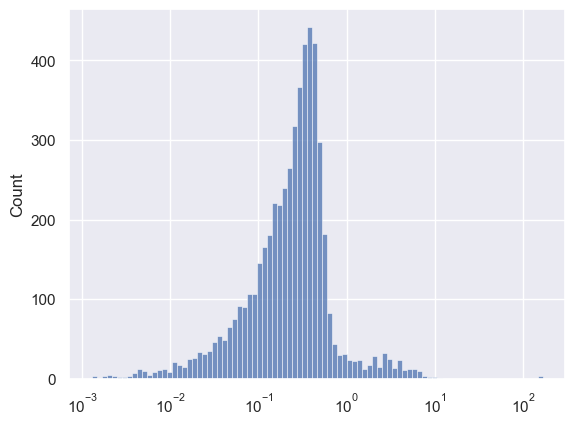

In [18]:
sns.histplot(x=r[r>1e-3], log_scale=True)

In [19]:
cache_fit = True

# least_squares give a deterministic result that depend on x0, the data, and the otimizer options
# hash the data as well as x0 to decide if we reuse last fit

filename = f"./results/linear-fit-{digest((data,x0))}.npy"

if cache_fit and path.isfile(filename):
    opt = load(filename)
else:
    opt = scipy.optimize.least_squares(residual, x0, loss="soft_l1", xtol=None, verbose=2) 
    
    # save result and remobe some stuff we don't neeed to save.
    del opt.jac
    del opt.active_mask
    del opt.fun
    
    save(filename, opt)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3872e+03                                    8.88e+06    
       1              8         1.3214e+03      6.58e+01       8.22e-02       8.48e+05    
       2             13         1.2966e+03      2.48e+01       3.21e-04       7.63e+04    
       3             14         1.2904e+03      6.14e+00       6.42e-04       5.04e+05    
       4             15         1.2841e+03      6.29e+00       6.42e-04       3.39e+05    
       5             16         1.2809e+03      3.25e+00       6.42e-04       3.71e+05    
       6             17         1.2774e+03      3.52e+00       6.42e-04       1.83e+05    
       7             18         1.2748e+03      2.57e+00       1.28e-03       4.20e+04    
       8             19         1.2723e+03      2.50e+00       2.57e-03       2.09e+03    
       9             20         1.2681e+03      4.16e+00       5.14e-03       3.24e+03    

In [20]:
opt

    message: `ftol` termination condition is satisfied.
    success: True
     status: 2
          x: [ 2.000e-01  1.998e-01 ...  2.196e-01  2.194e-01]
       cost: 790.0482755406848
       grad: [-1.596e-03 -1.693e-03 ...  3.591e-05  1.026e-04]
 optimality: 1.4985141896177083
       nfev: 64
       njev: 49

count    5.363000e+03
mean     3.967907e-01
std      6.864224e-01
min      1.273293e-11
25%      1.293730e-01
50%      2.660091e-01
75%      4.155912e-01
max      9.766423e+00
dtype: float64

<Axes: ylabel='Count'>

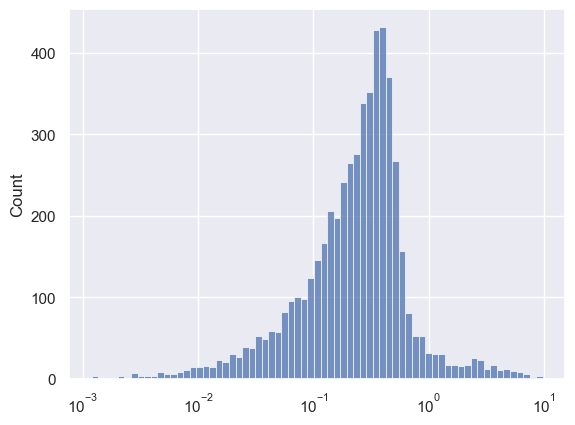

In [21]:
r_opt = np.abs(residual(opt.x))
pd.Series(r_opt).describe()
sns.histplot(x=r_opt[r_opt>1e-3], log_scale=True)

In [22]:
sol = unpack(opt.x, unpack_info)

tabledict(sol)

Nature Ingredient Finding,0.20001370426656595
Nature Main Skill Chance,0.19983306773859222
Nature Energy Recovery,0.08008636087389448
Pokemons ing fractions,[0.2562613 0.25460752 0.26579424 ... 0.18002857 0.2005599 0.21655417]
Pokemons skill products,[16.73780823 16.70913629 18.43770746 ... 44.71646654 12.80203369 15.28074683]
Charge Strength S,[0.74771084 0.32191482]
Charge Strength M,[0.74497415 0.32274401]
Ingredient Magnet S,[0.74546242 0.32267879]
Cooking Power-Up S,[0.74536454 0.32257565]
Extra Helpful S,[0.74523852 0.32267421]
Charge Energy S,[0.74747583 0.32199323]


In [23]:
# Format ing% and skillProduct pretty

res = pd.DataFrame({"Pokemon":pokedex["Pokemon"], "ing%": sol["Pokemons ing fractions"]*100.0, "skill% * skillValue": sol["Pokemons skill products"] })
res.set_index("Pokemon")

,ing%,skill% * skillValue
Pokemon,,
Bulbasaur,25.626130,16.737808
Ivysaur,25.460752,16.709136
Venusaur,26.579424,18.437707
Charmander,20.045107,9.683165
Charmeleon,22.669922,14.059074
Charizard,22.427364,14.006285
Squirtle,27.004195,17.632849
Wartortle,27.063450,17.582643
Blastoise,27.463102,18.442451


In [24]:
# Format main skill growth per level 

growth_display = {}
levels = np.array(list(range(2,7)))
growth_display["Level"] = levels

for record in mainskills.to_dict(orient='records') :   
    
    skillname = record["Skill"]
    params = sol[skillname]
    growth_display[skillname] = params[0]*np.exp(params[1]*levels)
    
df = pd.DataFrame(growth_display)
df.set_index("Level")


,Charge Strength S,Charge Strength M,Ingredient Magnet S,Cooking Power-Up S,Extra Helpful S,Charge Energy S,Energizing Cheer S,Energy for Everyone S,Dream Shard Magnet S,Metronome
Level,,,,,,,,,,
2,1.423460,1.420604,1.421350,1.420870,1.420910,1.423236,1.424678,1.421808,1.421971,1.421562
3,1.964044,1.961729,1.962631,1.961766,1.962014,1.963888,1.984651,1.963225,1.962408,1.963695
4,2.709923,2.708975,2.710043,2.708570,2.709180,2.709921,2.764724,2.710810,2.708246,2.712578
5,3.739063,3.740855,3.742087,3.739666,3.740877,3.739354,3.851405,3.743071,3.737548,3.747059
6,5.159037,5.165791,5.167155,5.163280,5.165461,5.159843,5.365210,5.168412,5.158050,5.176054


In [25]:
# What are the worst points ?

df = data[["Pokemon","ID","Level","MS lvl","NatureP","NatureN","Sub Skill 1","Sub Skill 2","RP"]].copy()

df["fit"] = RP(opt.x)
df["error"] = residual(opt.x)
df["error2"] = df["error"]**2

df = df.sort_values("error2", ascending = False)
df.head(100)

,Pokemon,ID,Level,MS lvl,NatureP,NatureN,Sub Skill 1,Sub Skill 2,RP,fit,error,error2
324,Charizard,CharizardMild276Helping Speed MSkill Level Up M,27.0,6,Ingredient Finding,Energy Recovery,Helping Speed M,Skill Level Up M,1514.0,1504.233577,9.766423,95.383023
2087,Togekiss,TogekissGentle103Skill Trigger M,10.0,3,Main Skill Chance,Energy Recovery,Skill Trigger M,,1282.0,1272.636678,9.363322,87.671808
346,Charizard,CharizardRash273Helping bonusHelping Speed M,27.0,3,Ingredient Finding,Main Skill Chance,Helping bonus,Helping Speed M,1440.0,1431.425399,8.574601,73.523786
507,Charmeleon,CharmeleonQuiet252Inventory Up MSleep EXP Bonus,25.0,2,Ingredient Finding,Exp Gains,Inventory Up M,Sleep EXP Bonus,1063.0,1054.488675,8.511325,72.442658
1773,Raticate,RaticateBrave281Inventory Up MSleep EXP Bonus,28.0,1,Speed of Help,EXP Gains,Inventory Up M,Sleep EXP Bonus,1097.0,1088.789716,8.210284,67.408767
270,Butterfree,ButterfreeImpish265Skill Level Up MSleep EXP B...,26.0,5,Energy Recovery,Ingredient Finding,Skill Level Up M,Sleep EXP Bonus,1404.0,1411.249304,-7.249304,52.552407
1996,Sudowoodo,SudowoodoHasty162Berry Finding S,16.0,2,EXP Gains,Energy Recovery,Berry Finding S,,743.0,750.047942,-7.047942,49.673487
230,Butterfree,ButterfreeCareful103Berry Finding S,10.0,3,Main Skill Chance,Ingredient Finding,Berry Finding S,,910.0,903.352296,6.647704,44.191964
1341,Leafeon,LeafeonRelaxed102Inventory Up M,10.0,2,Energy Recovery,EXP Gains,Inventory Up M,,944.0,937.355240,6.644760,44.152838
2501,Wigglytuff,WigglytuffRelaxed153Sleep EXP Bonus,15.0,3,Energy Recovery,EXP Gains,Sleep EXP Bonus,,1164.0,1170.641252,-6.641252,44.106227


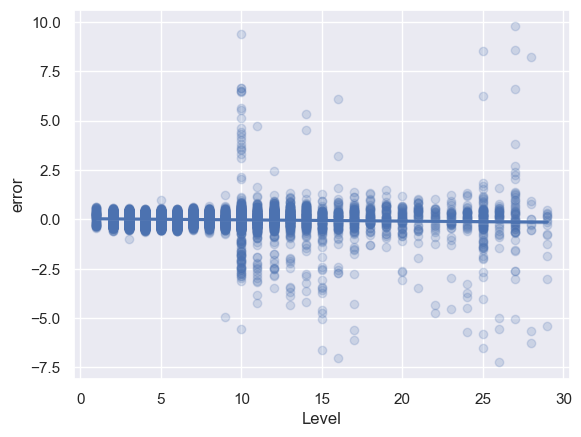

In [26]:
# Plot error vs level

err = df[["Level","error"]]
g = sns.regplot(data=err, x="Level", y="error", x_jitter=0, scatter_kws={'alpha':0.2})

In [27]:
# Do we have a slope ?

linearfit = scipy.stats.linregress(x=err["Level"], y=err["error"])

tableobj(linearfit)

intercept,0.0324841
intercept_stderr,0.0196153
pvalue,0.000535057
rvalue,-0.0472664
slope,-0.00605046
stderr,0.00174633


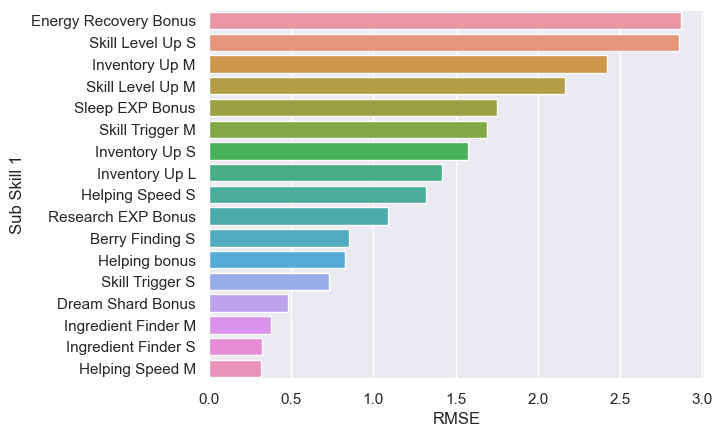

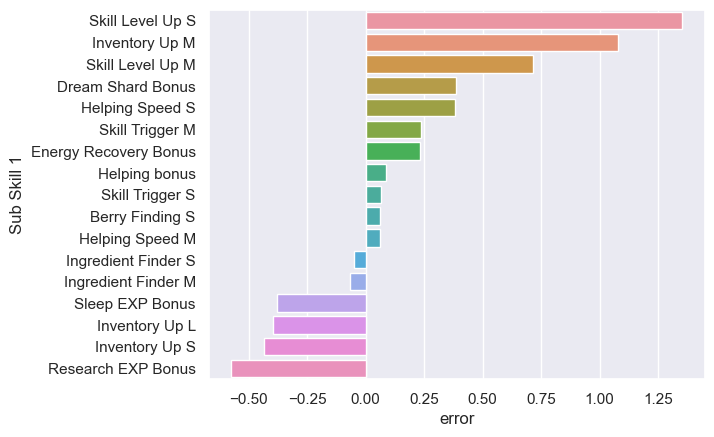

In [28]:
# Let's see what happens at level 10

subskill_err = ( df[["Level", "Sub Skill 1", "error", "error2"]][df["Level"]==10]
                .groupby("Sub Skill 1")
                .mean()
                .sort_values("error2", ascending = False)
                .reset_index() )

subskill_err["RMSE"] = np.sqrt(subskill_err["error2"])

_ = plt.figure()
_ = sns.barplot(data=subskill_err, y="Sub Skill 1", x="RMSE")

_ = plt.figure()
_ = sns.barplot(data=subskill_err.sort_values("error", ascending = False), y="Sub Skill 1", x="error")


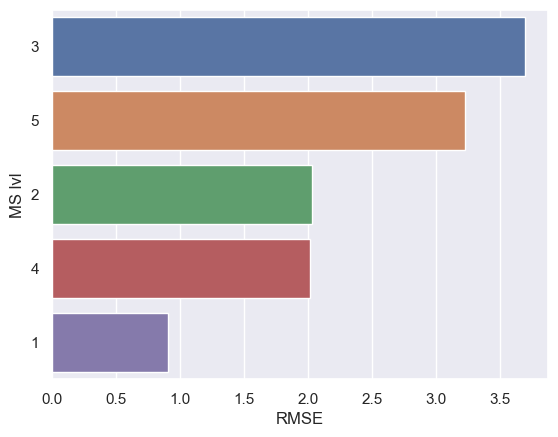

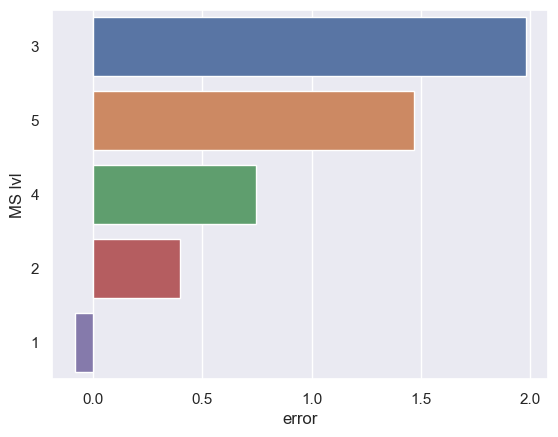

In [29]:
mslvl_err = ( df[["Level", "MS lvl", "error", "error2"]][df["Level"]==10]
                .groupby("MS lvl")
                .mean()
                .sort_values("error2", ascending = False)
                .reset_index() )

mslvl_err["RMSE"] = np.sqrt(mslvl_err["error2"])
mslvl_err["MS lvl"] = mslvl_err["MS lvl"].astype(str)

_ = plt.figure()
_ = sns.barplot(data=mslvl_err, y="MS lvl", x="RMSE")

_ = plt.figure()
_ = sns.barplot(data=mslvl_err.sort_values("error", ascending = False), y="MS lvl", x="error")


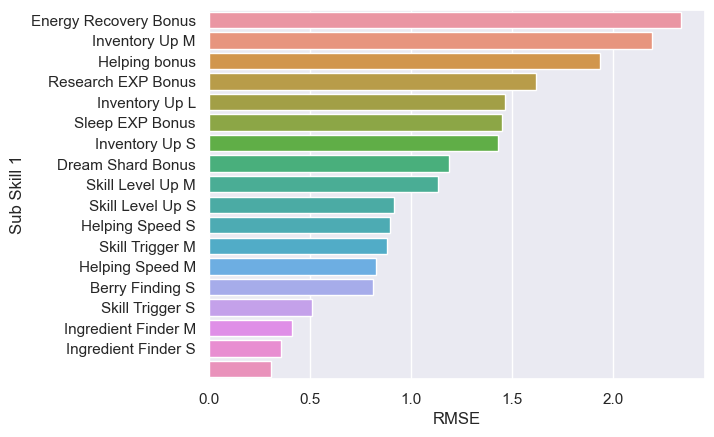

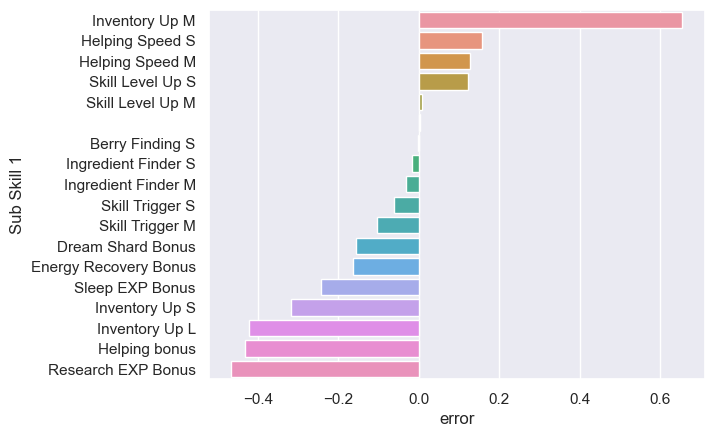

In [30]:
# Do we have more error in some skills ?

errorbyskill1 = (df[["Sub Skill 1","error","error2"]]
                .groupby("Sub Skill 1")
                .mean()
                .sort_values("error2", ascending = False)
                #.rename(columns={"error":"avg abs error"})
                .reset_index() )

errorbyskill1["RMSE"] = np.sqrt(errorbyskill1["error2"])
    
_ = plt.figure()
_ = sns.barplot(data=errorbyskill1, y="Sub Skill 1", x="RMSE")

_ = plt.figure()
_ = sns.barplot(data=errorbyskill1.sort_values("error", ascending = False), y="Sub Skill 1", x="error")

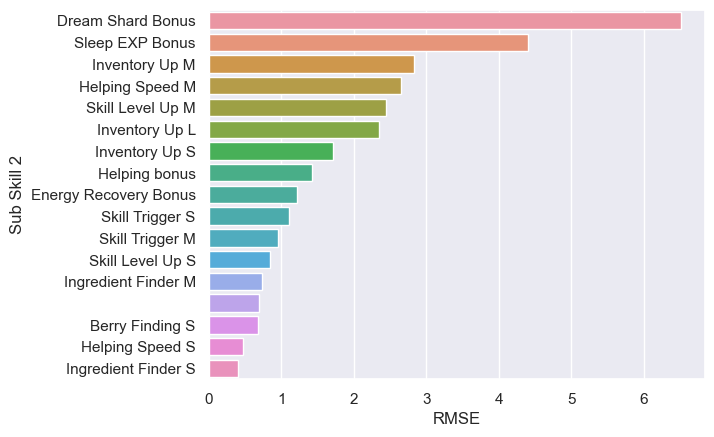

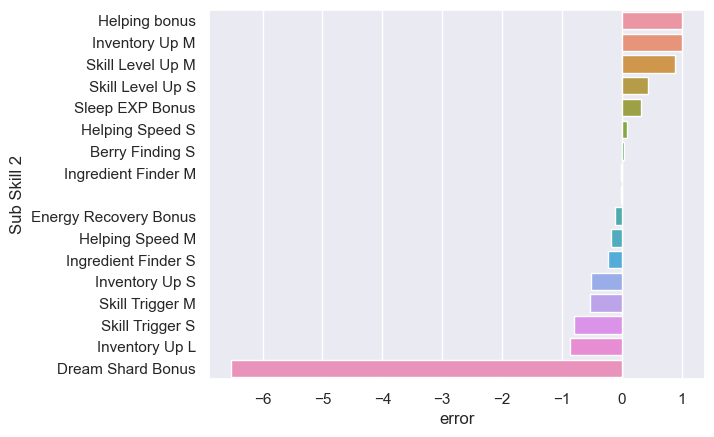

In [31]:
errorbyskill2 = (df[["Sub Skill 2","error","error2"]]
                .groupby("Sub Skill 2")
                .mean()
                .sort_values("error2", ascending = False)
                #.rename(columns={"error":"avg abs error"})
                .reset_index() )

errorbyskill2["RMSE"] = np.sqrt(errorbyskill2["error2"])
    
_ = plt.figure()
_ = sns.barplot(data=errorbyskill2, y="Sub Skill 2", x="RMSE")

_ = plt.figure()
_ = sns.barplot(data=errorbyskill2.sort_values("error", ascending = False), y="Sub Skill 2", x="error")